In [17]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [18]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
df = pd.read_excel("//content/drive/MyDrive/Cloud Computing/2024 PROPERTY TAX.xlsx")

Data Types of Each Column:
PID                            object
LEGAL_TYPE                     object
FOLIO                           int64
LAND_COORDINATE                 int64
ZONING_DISTRICT                object
ZONING_CLASSIFICATION          object
LOT                            object
PLAN                           object
BLOCK                          object
DISTRICT_LOT                   object
FROM_CIVIC_NUMBER              object
TO_CIVIC_NUMBER               float64
STREET_NAME                    object
PROPERTY_POSTAL_CODE           object
NARRATIVE_LEGAL_LINE1          object
NARRATIVE_LEGAL_LINE2          object
NARRATIVE_LEGAL_LINE3          object
NARRATIVE_LEGAL_LINE4          object
NARRATIVE_LEGAL_LINE5          object
CURRENT_LAND_VALUE            float64
CURRENT_IMPROVEMENT_VALUE     float64
TAX_ASSESSMENT_YEAR           float64
PREVIOUS_LAND_VALUE           float64
PREVIOUS_IMPROVEMENT_VALUE    float64
YEAR_BUILT                    float64
BIG_IMPROVEMENT_YEAR   

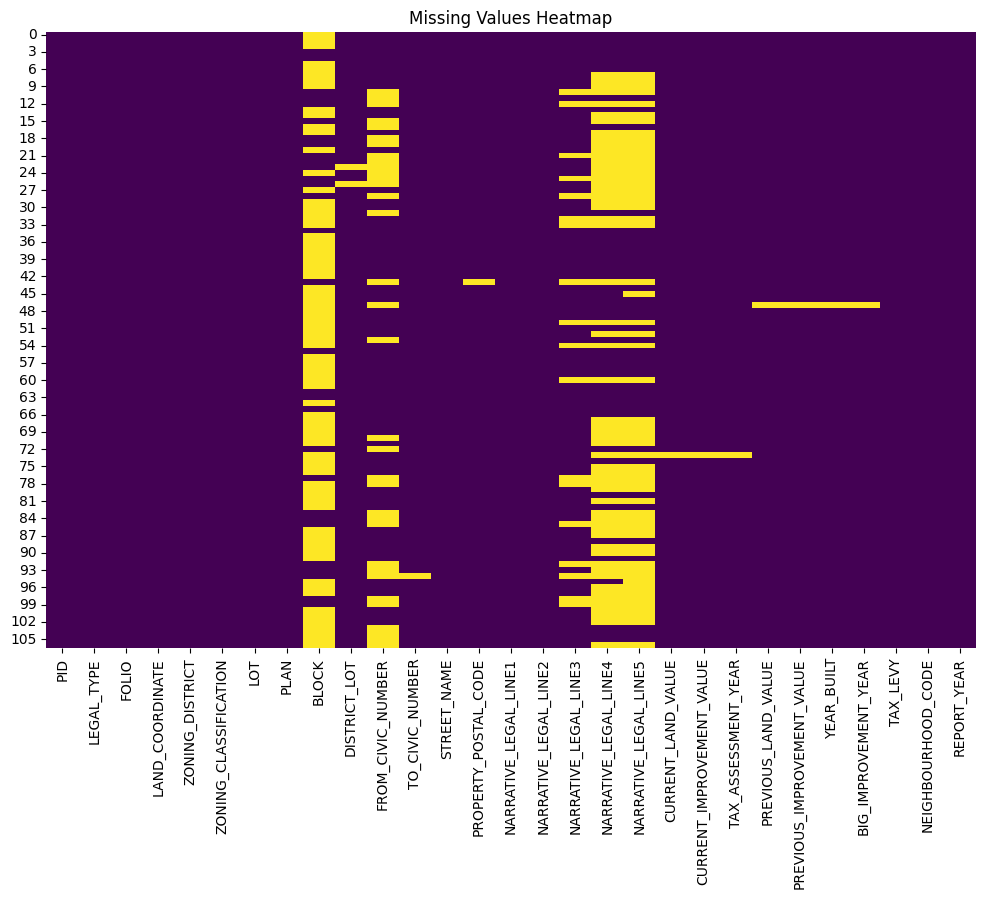


Missing Values After Cleaning:
PID                           0
LEGAL_TYPE                    0
FOLIO                         0
LAND_COORDINATE               0
ZONING_DISTRICT               0
ZONING_CLASSIFICATION         0
LOT                           0
PLAN                          0
BLOCK                         0
DISTRICT_LOT                  0
FROM_CIVIC_NUMBER             0
TO_CIVIC_NUMBER               0
STREET_NAME                   0
PROPERTY_POSTAL_CODE          0
NARRATIVE_LEGAL_LINE1         0
NARRATIVE_LEGAL_LINE2         0
NARRATIVE_LEGAL_LINE3         0
NARRATIVE_LEGAL_LINE4         0
NARRATIVE_LEGAL_LINE5         0
CURRENT_LAND_VALUE            0
CURRENT_IMPROVEMENT_VALUE     0
TAX_ASSESSMENT_YEAR           0
PREVIOUS_LAND_VALUE           0
PREVIOUS_IMPROVEMENT_VALUE    0
YEAR_BUILT                    0
BIG_IMPROVEMENT_YEAR          0
TAX_LEVY                      0
NEIGHBOURHOOD_CODE            0
REPORT_YEAR                   0
dtype: int64


In [20]:
# 1. Check the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

# 2. Check for missing values in each column
print("\nMissing Values Per Column:")
missing_values = df.isnull().sum()
print(missing_values)

# 3. Calculate the percentage of missing values
print("\nPercentage of Missing Values Per Column:")
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

# 4. Visualize missing data with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 5. Handling missing values based on column type
# - For numerical columns: Fill missing values with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# - For categorical columns: Fill missing values with 'Unknown' or the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Check if missing values have been handled
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

In [21]:
# Descriptive statistics for numerical columns
numerical_summary = df.describe()
print("\nNumerical Summary:")
print(numerical_summary)



Numerical Summary:
              FOLIO  LAND_COORDINATE  TO_CIVIC_NUMBER  CURRENT_LAND_VALUE  \
count  1.070000e+02     1.070000e+02       107.000000        1.070000e+02   
mean   5.629731e+11     5.629731e+07      2014.150943        1.506178e+06   
std    2.033843e+11     2.033843e+07      1320.622272        2.541042e+06   
min    4.071792e+10     4.071792e+06        68.000000        2.690000e+05   
25%    6.225891e+11     6.225891e+07       979.500000        4.945000e+05   
50%    6.400735e+11     6.400735e+07      2169.000000        6.560000e+05   
75%    6.501495e+11     6.501495e+07      2745.500000        1.501089e+06   
max    8.303108e+11     8.303108e+07      7042.000000        1.872200e+07   

       CURRENT_IMPROVEMENT_VALUE  TAX_ASSESSMENT_YEAR  PREVIOUS_LAND_VALUE  \
count               1.070000e+02                107.0         1.070000e+02   
mean                5.033660e+05               2024.0         1.486055e+06   
std                 2.402960e+06                  0.

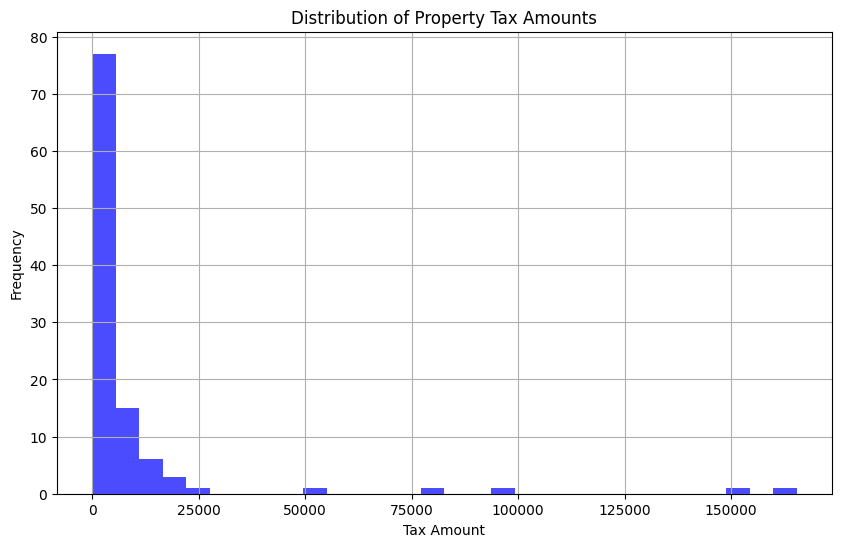

In [24]:
#Data Visualization - Histogram
# Convert non-numeric values to NaN for proper visualization
df['TAX_LEVY'] = pd.to_numeric(df['TAX_LEVY'], errors='coerce')

# Fill NaN values with the mean for visualization
df['TAX_LEVY'].fillna(df['TAX_LEVY'].mean(), inplace=True)

# Plot the histogram for TAX_LEVY
plt.figure(figsize=(10, 6))
plt.hist(df['TAX_LEVY'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Property Tax Amounts')
plt.xlabel('Tax Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

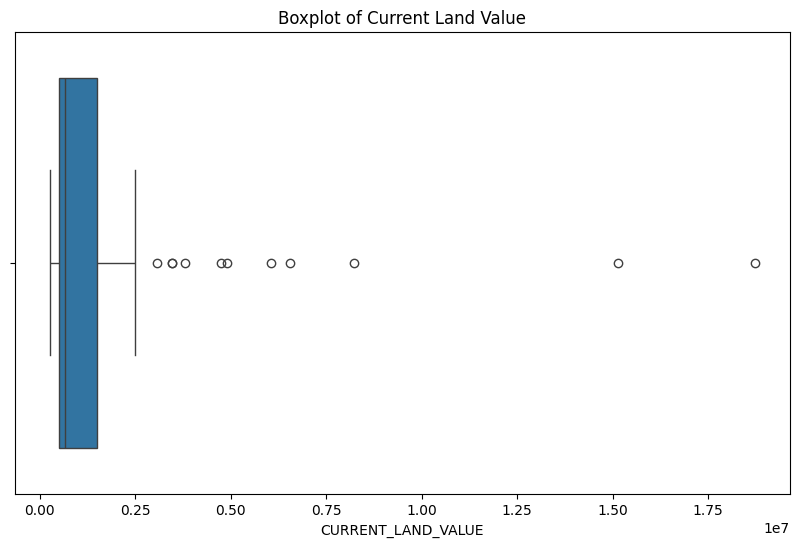

In [25]:
# #Data Visualization - Boxplot
# Convert non-numeric values to NaN for proper visualization
df['CURRENT_LAND_VALUE'] = pd.to_numeric(df['CURRENT_LAND_VALUE'], errors='coerce')

# Fill NaN values with the mean for visualization
df['CURRENT_LAND_VALUE'].fillna(df['CURRENT_LAND_VALUE'].mean(), inplace=True)

# Plot the boxplot for CURRENT_LAND_VALUE
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CURRENT_LAND_VALUE'])
plt.title('Boxplot of Current Land Value')
plt.show()

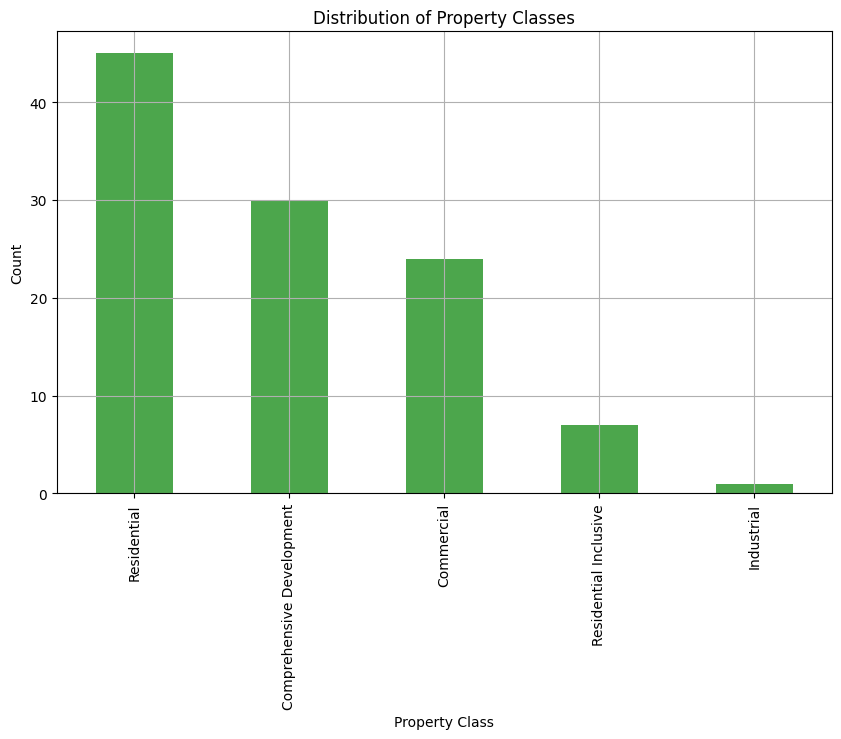

In [26]:
# Bar chart for ZONING_CLASSIFICATION distribution
plt.figure(figsize=(10, 6))
df['ZONING_CLASSIFICATION'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Property Classes')
plt.xlabel('Property Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

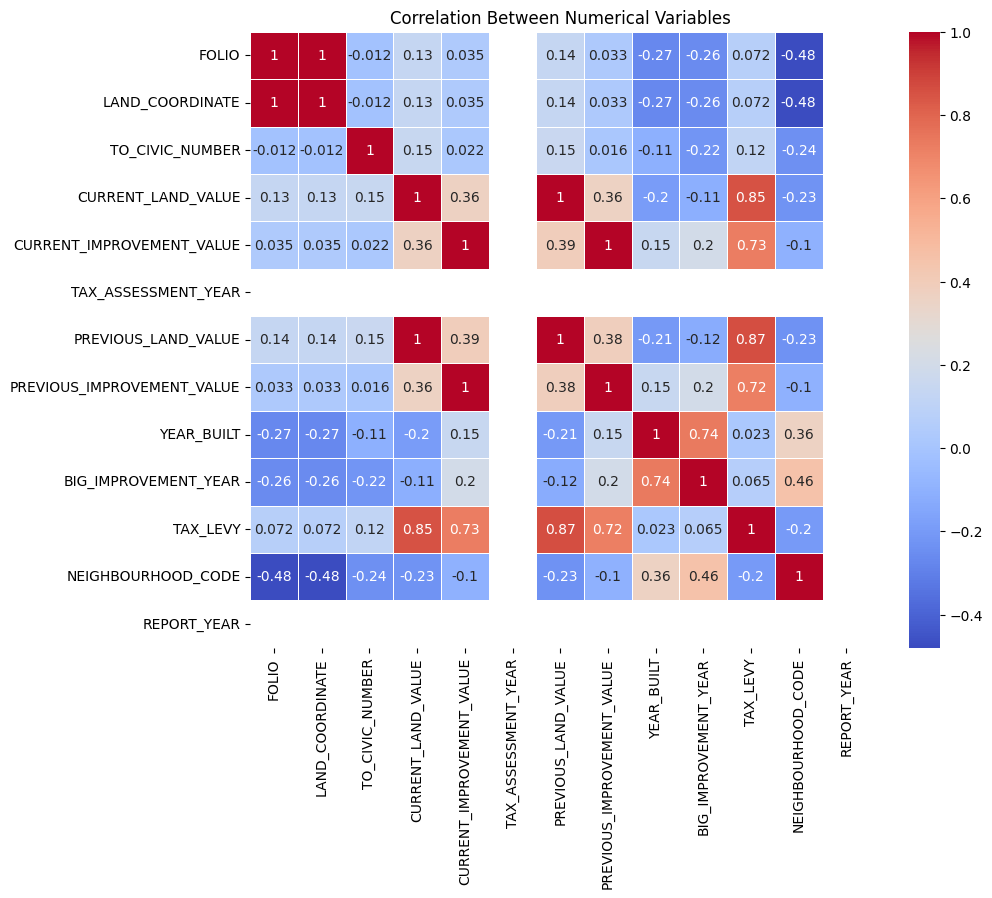

In [27]:
# Select numerical columns for correlation analysis
numerical_columns_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Variables')
plt.show()

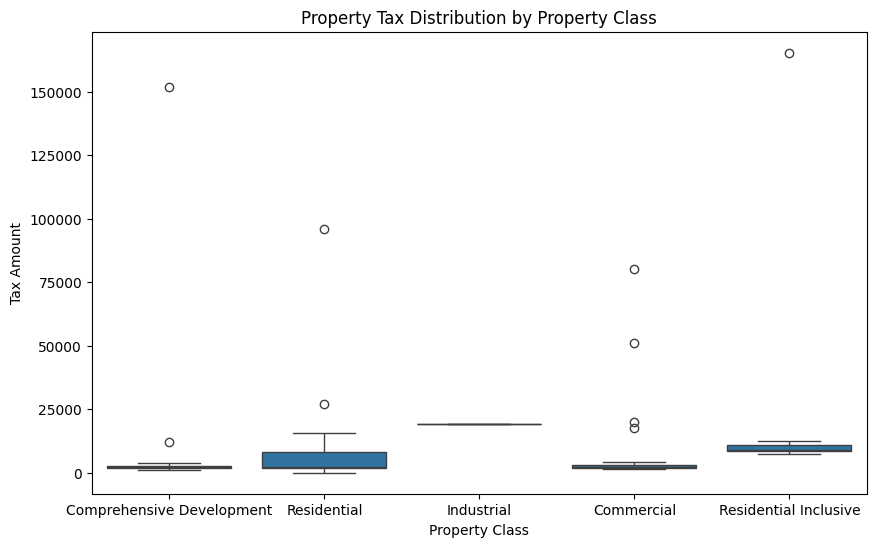

In [28]:
# Boxplot for tax distribution by ZONING_CLASSIFICATION
plt.figure(figsize=(10, 6))
sns.boxplot(x='ZONING_CLASSIFICATION', y='TAX_LEVY', data=df)
plt.title('Property Tax Distribution by Property Class')
plt.xlabel('Property Class')
plt.ylabel('Tax Amount')
plt.show()

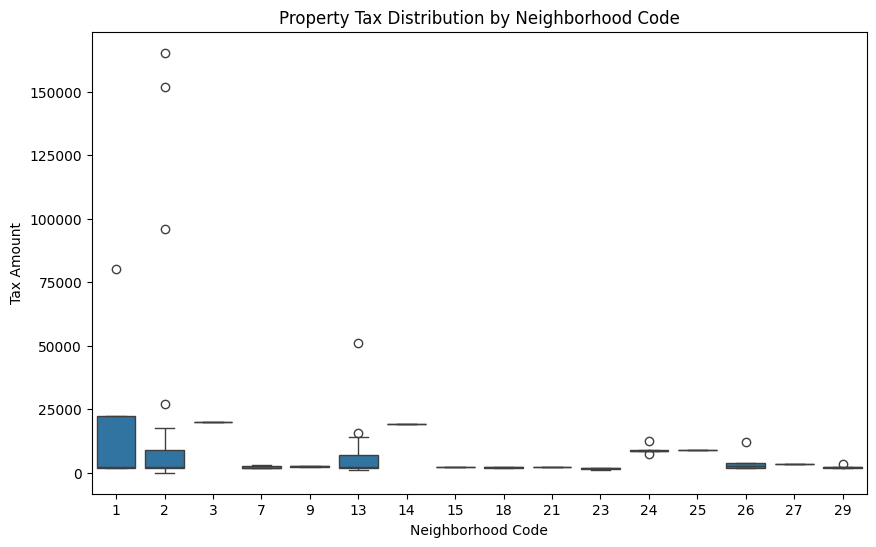

In [29]:
# Boxplot for tax distribution by NEIGHBOURHOOD_CODE
plt.figure(figsize=(10, 6))
sns.boxplot(x='NEIGHBOURHOOD_CODE', y='TAX_LEVY', data=df)
plt.title('Property Tax Distribution by Neighborhood Code')
plt.xlabel('Neighborhood Code')
plt.ylabel('Tax Amount')
plt.show()

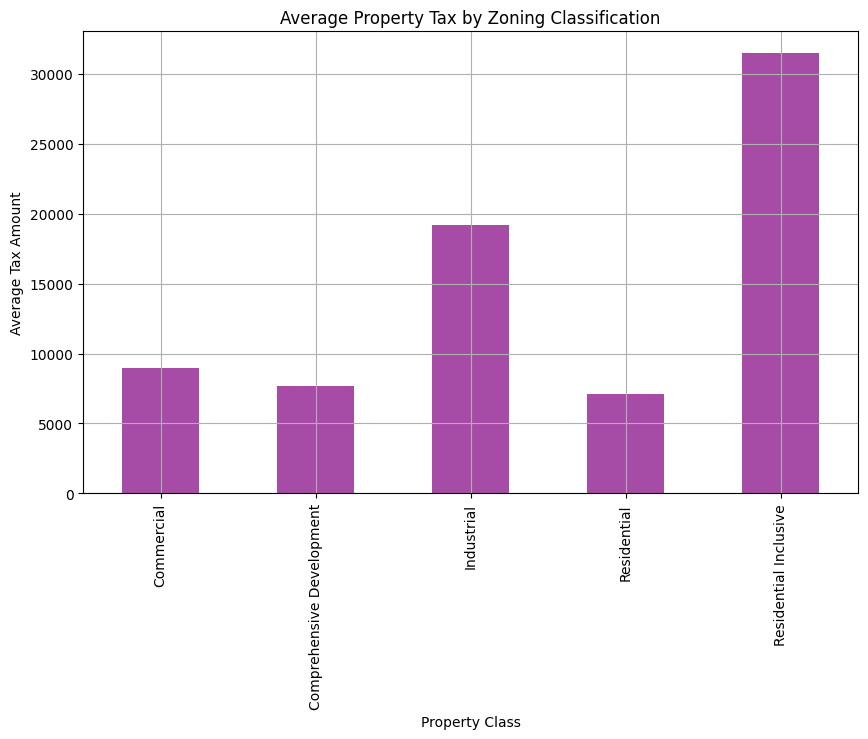

In [30]:
#Performance analysis
# Calculate average TAX_LEVY by ZONING_CLASSIFICATION
property_class_tax = df.groupby('ZONING_CLASSIFICATION')['TAX_LEVY'].mean()

# Bar chart for average TAX_LEVY by property class
plt.figure(figsize=(10, 6))
property_class_tax.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Property Tax by Zoning Classification')
plt.xlabel('Property Class')
plt.ylabel('Average Tax Amount')
plt.grid(True)
plt.show()

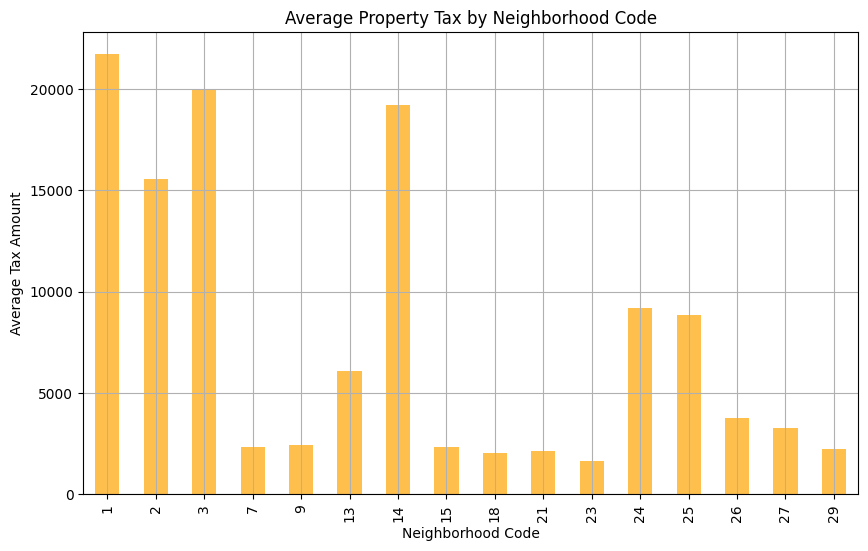

In [31]:
# Calculate average TAX_LEVY by NEIGHBOURHOOD_CODE
neighborhood_tax = df.groupby('NEIGHBOURHOOD_CODE')['TAX_LEVY'].mean()

# Bar chart for average TAX_LEVY by neighborhood
plt.figure(figsize=(10, 6))
neighborhood_tax.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Property Tax by Neighborhood Code')
plt.xlabel('Neighborhood Code')
plt.ylabel('Average Tax Amount')
plt.grid(True)
plt.show()

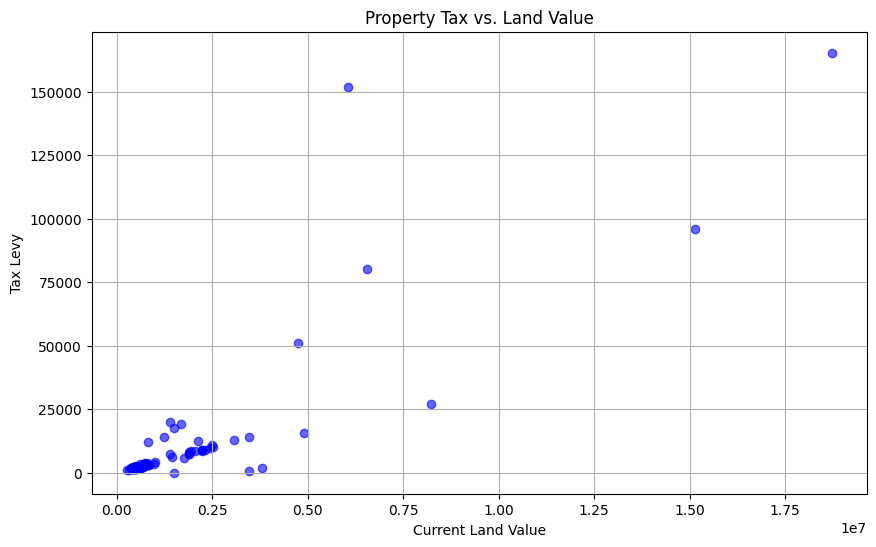

In [32]:
# Scatter plot for CURRENT_LAND_VALUE vs. TAX_LEVY
plt.figure(figsize=(10, 6))
plt.scatter(df['CURRENT_LAND_VALUE'], df['TAX_LEVY'], color='blue', alpha=0.6)
plt.title('Property Tax vs. Land Value')
plt.xlabel('Current Land Value')
plt.ylabel('Tax Levy')
plt.grid(True)
plt.show()